## 판다스를 활용한 데이터 조사

In [5]:
!pip install seaborn

In [6]:
!pip install pandas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 깃허브에서 준비된 데이터 가져오기
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...


In [10]:
# 피마 인디언 데이터셋 가져오기
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [13]:
df.describe() # 정보별 특징 알아보기

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.corr() # 각 항목이 어느 정도 상관관계를 가지고 있는지 알아보기

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
colormap = plt.cm.gist_heat # 그래프의 색상 구성 정하기
plt.figure(figsize=(12,12)) # 그래프의 크기 정하기

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

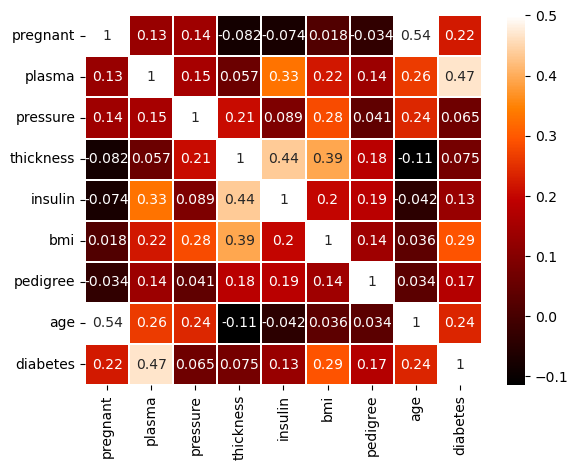

In [18]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor = 'white', annot=True)
plt.show()

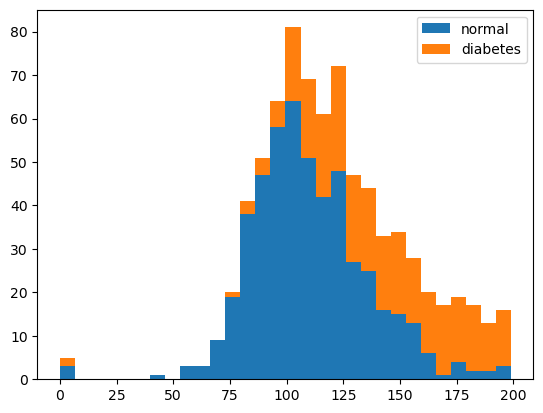

In [20]:
# 플라즈마 기준
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, 
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

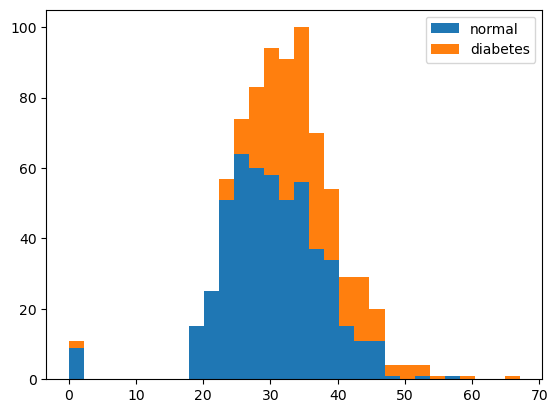

In [22]:
# BMI 기준
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, 
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

## 피마 인디언의 당뇨병 예측 실행

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# 깃허브에서 준비된 데이터 가져오기
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [42]:
# 피마 인디언 데이터셋 가져오기
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

X = df.iloc[:, 0:8] # 세부 정보를 X로 지정
y = df.iloc[:, 8] # 당뇨병 여부를 y로 지정

In [43]:
# 모델 구조 지정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
# 모델 실행
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 0s 1ms/step - loss: 4.6659 - accuracy: 0.4661
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 1.7222 - accuracy: 0.5430
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 1.2515 - accuracy: 0.5521
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.9664 - accuracy: 0.5833
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.9290 - accuracy: 0.5833
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7539 - accuracy: 0.6367
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.6276
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7394 - accuracy: 0.6510
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7469 - accuracy: 0.6458
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6774 - accura

## 아이리스 품종 예측하기

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [49]:
df = pd.read_csv('./data/iris3.csv')

In [50]:
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [51]:
# 원-핫 인코딩 처리
y = pd.get_dummies(y)

In [52]:
# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
# 모델 실행
history = model.fit(X, y, epochs=50, batch_size=5)

Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 0.9728 - accuracy: 0.4267
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.7867
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.8067
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5393 - accuracy: 0.8600
Epoch 5/50
30/30 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.8533
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8667
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8867
Epoch 8/50
30/30 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8733
Epoch 9/50
30/30 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.9200
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8667
Epoch 11/50
30/30 [

In [54]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import numpy